In [1]:
%matplotlib notebook
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

import numpy as np
import matplotlib.pyplot as plt

In [2]:
def makeNonCvxFunc(ncentres=5, xlims=(-3, 3), ylims=(-3, 3)):
    np.random.seed(24)
    mu = np.random.rand(ncentres, 2)
    mu[:, 0] *= (xlims[1] - xlims[0])
    mu[:, 0] += xlims[0]
    mu[:, 1] *= (ylims[1] - ylims[0])
    mu[:, 1] += ylims[0]
    wts = np.random.randn(ncentres)
    def nonConvexFunc(x, y):
        v = np.array(mu)
        v[:, 0] -= x
        v[:, 1] -= y
        v = np.sum(v**2, axis=1)
        return np.sum(np.exp(-v) * wts)
    def gradNCF(x, y):
        v = np.array(mu)
        v[:, 0] -= x
        v[:, 1] -= y
        ww = np.exp(-np.sum(v**2, axis=1)) * wts
        return np.sum(v.T * ww, axis=1)
    return nonConvexFunc, gradNCF

In [3]:
f, gf = makeNonCvxFunc()
vf = np.vectorize(f)
vgf = np.vectorize(gf)
def GD(x, f, gf, eta=0.2):
    return x - eta * gf(x[0], x[1])

In [4]:
X, Y = np.meshgrid(np.linspace(-5, 5, 400), np.linspace(-5, 5, 400))
Z = vf(X.ravel(), Y.ravel()).reshape(X.shape)

<IPython.core.display.Javascript object>


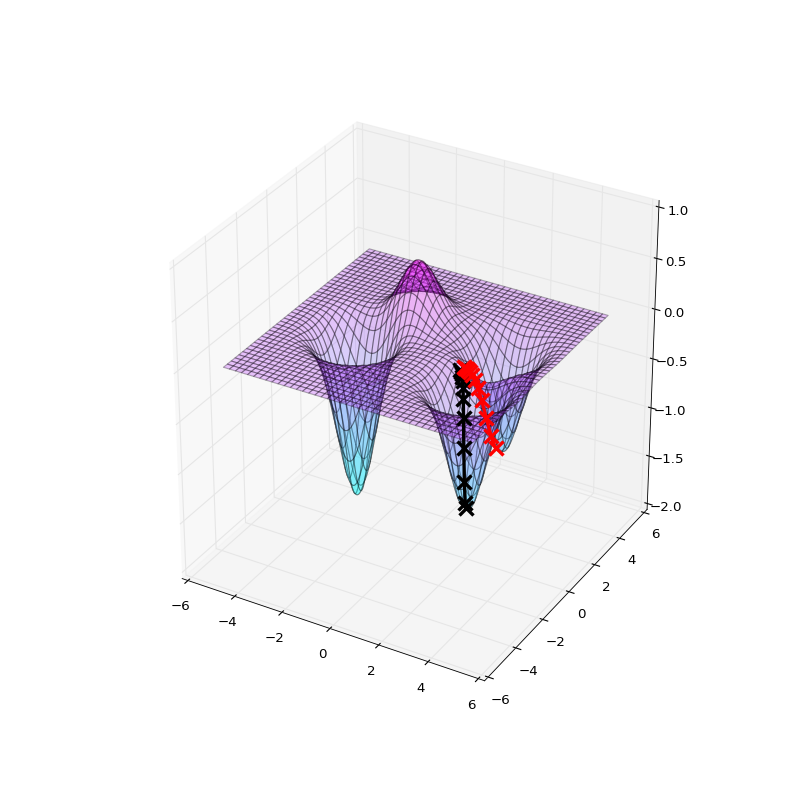

In [5]:
x1 = np.array([2, -0.5])
x2 = np.array([2, -0.25])
X1 = np.zeros([12, 3])
X2 = np.zeros([12, 3])
for i in range(12):
    X1[i, :2] = x1
    X2[i, :2] = x2
    X1[i, 2] = f(x1[0], x1[1])
    X2[i, 2] = f(x2[0], x2[1])
    x1 = GD(x1, f, gf, eta=0.5)
    x2 = GD(x2, f, gf, eta=0.5)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.cool, alpha=0.3)
ax.plot(X1[:, 0], X1[:, 1], X1[:, 2], lw=3, c='k', marker='x', markeredgewidth=3, markersize=12)
ax.plot(X2[:, 0], X2[:, 1], X2[:, 2], lw=3, c='r', marker='x', markeredgewidth=3, markersize=12)

In [6]:
def qf(x, y):
    return (x**2 + y**2)/20 + 2
def gqf(x, y):
    return np.array([x, y]) / 10
vqf = np.vectorize(qf)

In [7]:
X, Y = np.meshgrid(np.linspace(-5, 5, 400), np.linspace(-5, 5, 400))
Z = vqf(X.ravel(), Y.ravel()).reshape(X.shape)

<IPython.core.display.Javascript object>


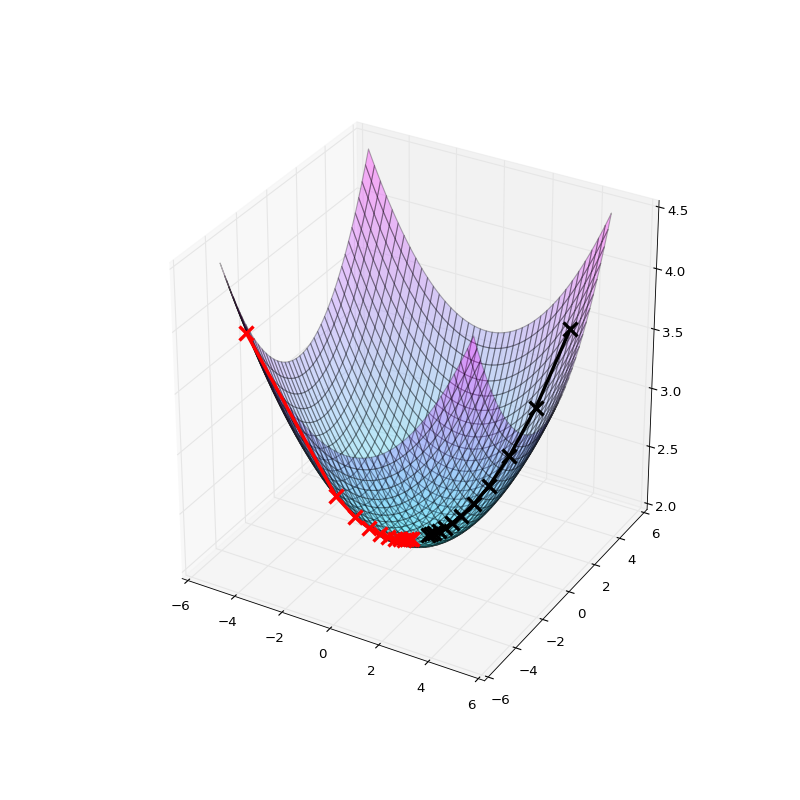

In [8]:
x1 = np.array([4, 4.])
x2 = np.array([-4, -5])
X1 = np.zeros([12, 3])
X2 = np.zeros([12, 3])
for i in range(12):
    X1[i, :2] = x1
    X2[i, :2] = x2
    X1[i, 2] = qf(x1[0], x1[1])
    X2[i, 2] = qf(x2[0], x2[1])
    x1 = GD(x1, qf, gqf, eta=2.2)
    x2 = GD(x2, qf, gqf, eta=2.2)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap=cm.cool, alpha=0.3)
ax.plot(X1[:, 0], X1[:, 1], X1[:, 2], lw=3, c='k', marker='x', markeredgewidth=3, markersize=12)
ax.plot(X2[:, 0], X2[:, 1], X2[:, 2], lw=3, c='r', marker='x', markeredgewidth=3, markersize=12)

In [9]:
def aoki(x, y):
    return 0.5 * (x**2 - y)**2 + 0.5 * (x - 1.)**2
def aokigrad(x, y): 
    return np.array([2 * (x**2 - y) * x + x - 1, y-x**2])
vaoki = np.vectorize(aoki)

<IPython.core.display.Javascript object>


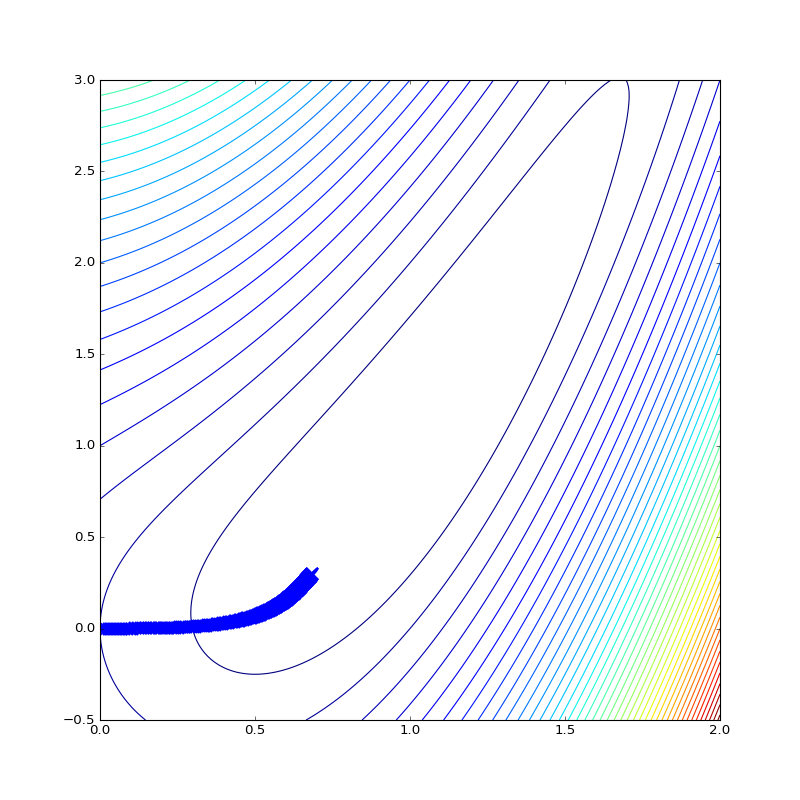

In [10]:
x1 = np.array([0, 0])
x2 = np.array([0, 0])
X1 = np.zeros([200, 2])
X2 = np.zeros([200, 2])
for i in range(200):
    X1[i, :] = x1
    X2[i, :] = x2
    x1 = GD(x1, aoki, aokigrad, eta=0.6)
    x2 = GD(x2, aoki, aokigrad, eta=0.01)

xmin, xmax = 0, 2
ymin, ymax = -0.5, 3
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

X, Y = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))
Z = vaoki(X.ravel(), Y.ravel()).reshape(X.shape)

ax.contour(X, Y, Z, 50)
#ax.plot(X1[:, 0], X1[:, 1], marker='x', markeredgewidth=2, markersize=10)
ax.plot(X2[:, 0], X2[:, 1], marker='x', markeredgewidth=2, markersize=10)